In [644]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [645]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [646]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/MIS444 PREDICTION DATASET/cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [647]:
# Data Checking

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB
None
              year  selling_price     km_driven  mileage(km/ltr/kg)  \
count  8128.000000   8.128000e+03  8.128000e+03         7907.000000

In [648]:
df.shape

(8128, 12)

In [649]:
# Check Null Values
df.isnull().values.any()

np.True_

In [650]:
print("There are {} missing values in data frame".format(df.isnull().sum().sum()))
print("Missing Values:\n", df.isnull().sum())

There are 878 missing values in data frame
Missing Values:
 name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


In [651]:
# Remove rows with missing values
df.dropna(inplace=True)
print("\nMissing values after removal:\n", df.isnull().sum())



Missing values after removal:
 name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


In [652]:
print("There are {} duplicated values in data frame".format(df.duplicated().sum()))

There are 1189 duplicated values in data frame


In [653]:
# Remove duplicated values
df.drop_duplicates(inplace=True)
print("\nNumber of duplicated values after removal:", df.duplicated().sum())


Number of duplicated values after removal: 0


<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6718 non-null   object 
 1   year                6718 non-null   int64  
 2   selling_price       6718 non-null   int64  
 3   km_driven           6718 non-null   int64  
 4   fuel                6718 non-null   object 
 5   seller_type         6718 non-null   object 
 6   transmission        6718 non-null   object 
 7   owner               6718 non-null   object 
 8   mileage(km/ltr/kg)  6718 non-null   float64
 9   engine              6718 non-null   float64
 10  max_power           6718 non-null   object 
 11  seats               6718 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 682.3+ KB
None


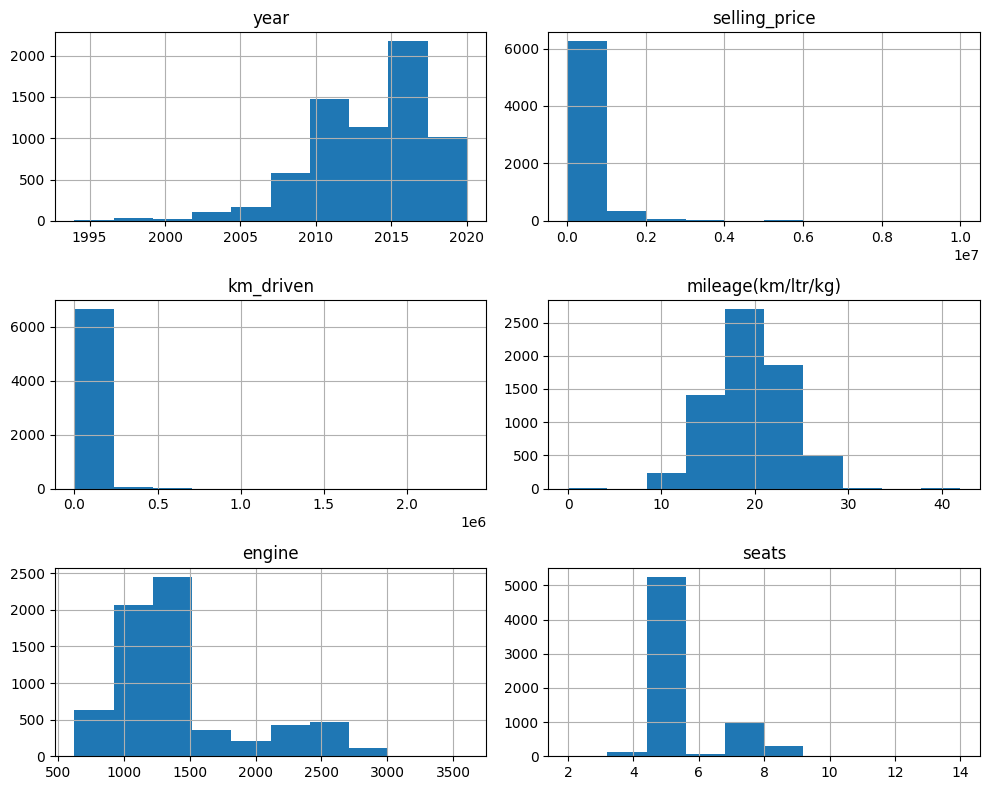

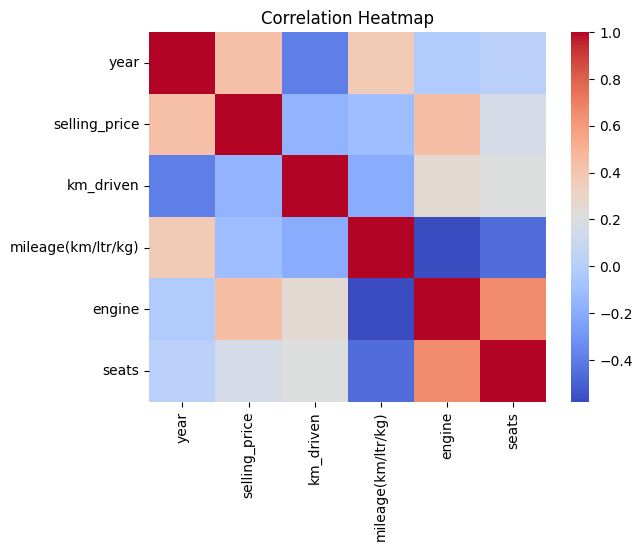

In [654]:
# Exploratory Data Analysis (EDA)

# Display basic information about the dataset
print(df.info())

# Visualize distributions of numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

numerical_df = df[numerical_cols]
sns.heatmap(numerical_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


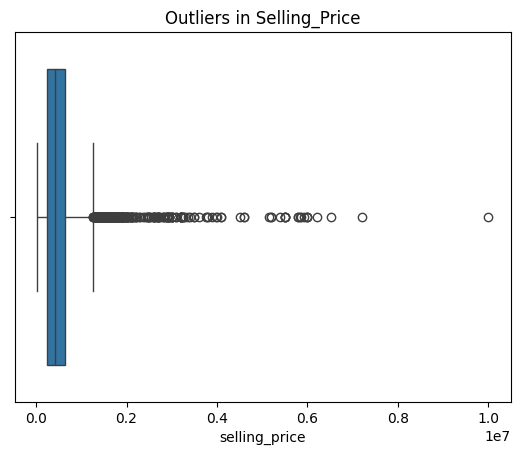

In [655]:
# Boxplot for outlier detection
sns.boxplot(x=df["selling_price"])
plt.title("Outliers in Selling_Price")
plt.show()


Shape of DataFrame after removing outliers: (6412, 12)


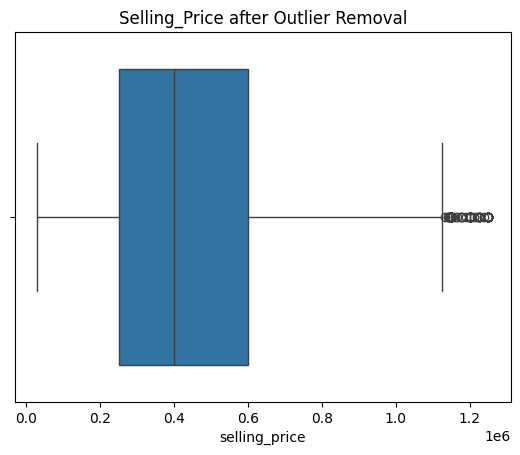

In [656]:
# Remove outliers using IQR
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['selling_price'] >= lower_bound) & (df['selling_price'] <= upper_bound)]

print("\nShape of DataFrame after removing outliers:", df.shape)

# Display boxplot after removing outliers
sns.boxplot(x=df["selling_price"])
plt.title("Selling_Price after Outlier Removal")
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 6412 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6412 non-null   object 
 1   year                6412 non-null   int64  
 2   selling_price       6412 non-null   int64  
 3   km_driven           6412 non-null   int64  
 4   fuel                6412 non-null   object 
 5   seller_type         6412 non-null   object 
 6   transmission        6412 non-null   object 
 7   owner               6412 non-null   object 
 8   mileage(km/ltr/kg)  6412 non-null   float64
 9   engine              6412 non-null   float64
 10  max_power           6412 non-null   object 
 11  seats               6412 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 651.2+ KB
None


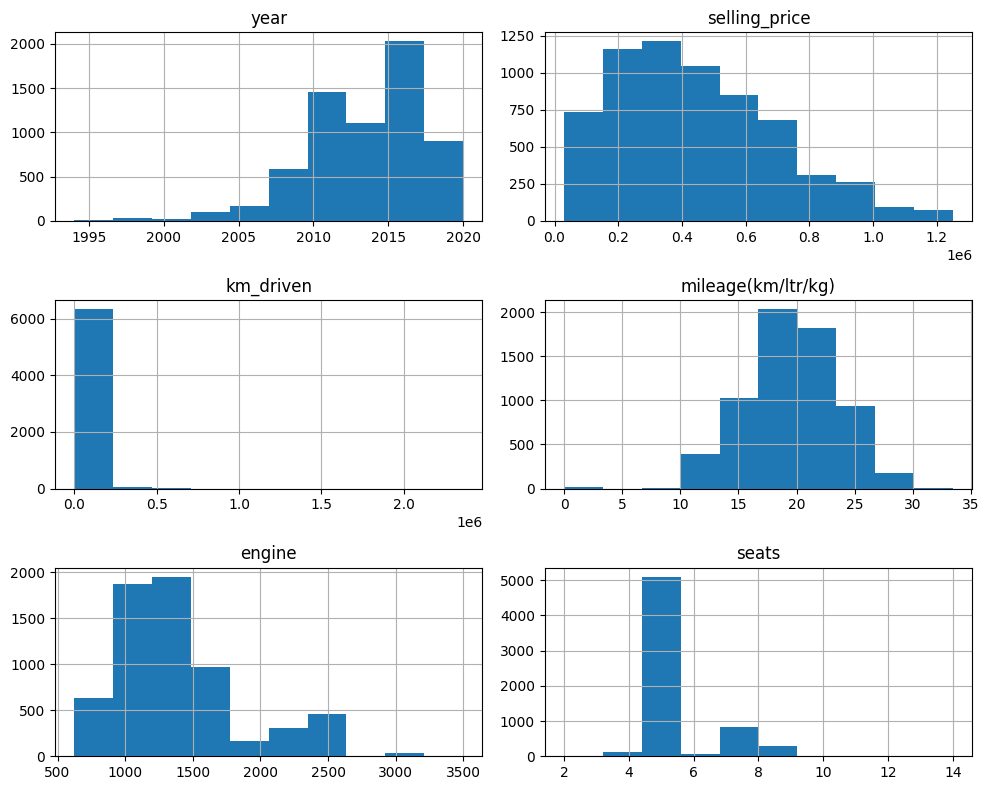

In [657]:
# Exploratory Data Analysis (EDA) After Removing Outliers

# Display basic information about the dataset
print(df.info())

# Visualize distributions of numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


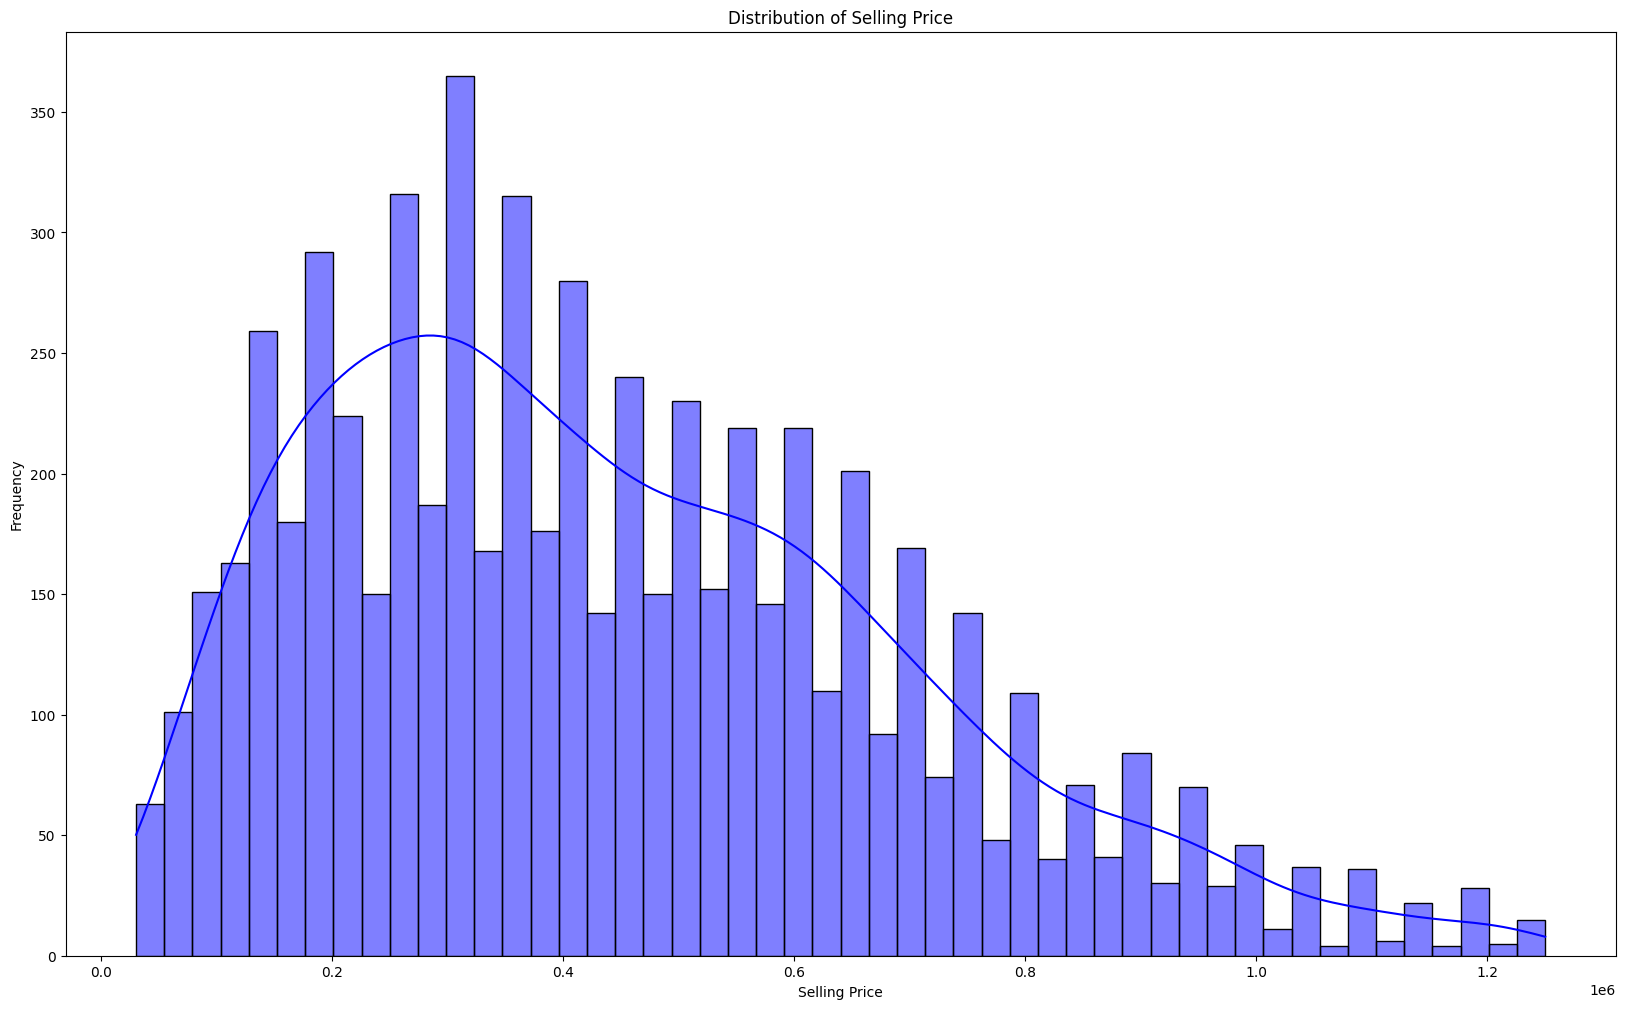

In [658]:
# Check distribution of the target variable After Removing Outliers
plt.figure(figsize=(20, 12))
sns.histplot(df['selling_price'], kde=True, color='blue', bins=50)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

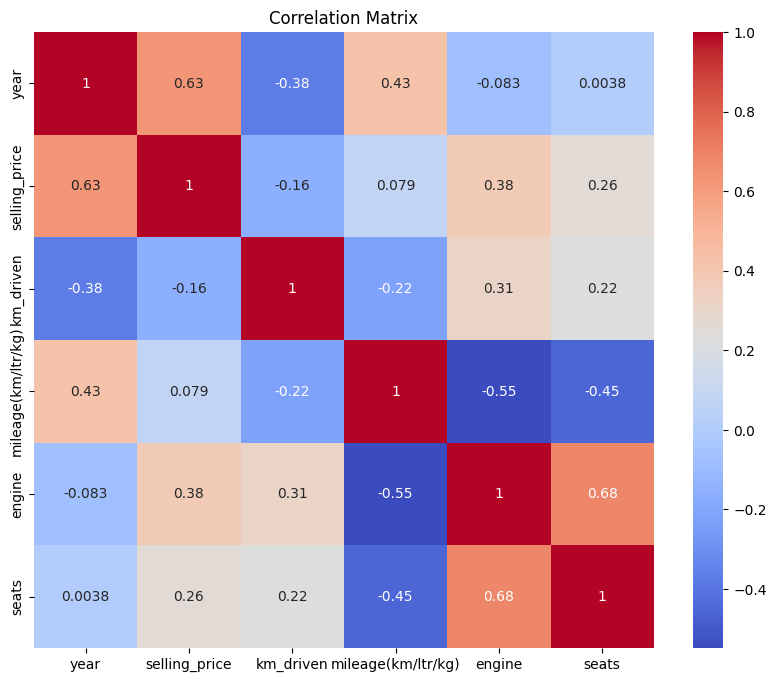

In [659]:
# Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [660]:
# Preprocessing
X = df.drop(columns=["selling_price"])
y = df["selling_price"]

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [661]:
 # Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [662]:
# Feature Selection
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['year', 'engine', 'seats', 'fuel_Diesel', 'fuel_Petrol',
       'transmission_Manual', 'owner_Second Owner', 'max_power_126.2',
       'max_power_140', 'max_power_88.5'],
      dtype='object')


In [663]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

In [664]:
# Define Models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42),
    "KNN": KNeighborsRegressor(),
}

results = {}

In [665]:
# Train Models

trained_models = {}
try:
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
    print("\nAll models trained successfully!")
except Exception as e:
    print(f"An error occurred during model training: {e}")


All models trained successfully!


In [666]:
# TEST AND RESULT EVALUATION

results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {
        "R2 Test": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    }

print("\nModel Evaluation Results Without Optimization:")
for name, metrics in results.items():
    print(f"\n{name} Performance:")
    print(f"Test R2: {metrics['R2 Test']:.4f}, MSE: {metrics['MSE']:.2f}, RMSE: {metrics['RMSE']:.2f}, MAE: {metrics['MAE']:.2f}")
    print("-" * 50)




Model Evaluation Results Without Optimization:

Linear Regression Performance:
Test R2: 0.6716, MSE: 22008171223.71, RMSE: 148351.51, MAE: 112471.15
--------------------------------------------------

Decision Tree Performance:
Test R2: 0.8143, MSE: 12441875210.09, RMSE: 111543.15, MAE: 78515.18
--------------------------------------------------

Random Forest Performance:
Test R2: 0.8348, MSE: 11071360902.73, RMSE: 105220.53, MAE: 74795.09
--------------------------------------------------

XGBoost Performance:
Test R2: 0.8495, MSE: 10084958208.00, RMSE: 100423.89, MAE: 72003.20
--------------------------------------------------

KNN Performance:
Test R2: 0.7894, MSE: 14112285756.57, RMSE: 118795.14, MAE: 83652.74
--------------------------------------------------


In [667]:
# Hyperparameter Tuning with RandomSearchCV
# Let's increase n_iter to 50 to get a better exploration of the parameter space.

param_dist = {
    "Linear Regression": {},  # Linear Regression has no hyperparameters to tune

    "Decision Tree": {
        "max_depth": randint(low=5, high=50),
        "min_samples_split": randint(low=2, high=20),
        "min_samples_leaf": randint(low=1, high=10),
    },
    "Random Forest": {
        "n_estimators": randint(low=100, high=500),
        "max_depth": randint(low=5, high=30),
        "min_samples_split": randint(low=2, high=15),
    },
    "XGBoost": {
        "n_estimators": randint(low=100, high=500),
        "learning_rate": uniform(loc=0.01, scale=0.1),
        "max_depth": randint(low=3, high=10),
    },
    "KNN": {
        "n_neighbors": randint(low=3, high=20),
        "weights": ["uniform", "distance"],
        "p": [1, 2],
    }
}

tuned_models = {}
tuned_results = {} # Initialize tuned_results dictionary

try:
    for name, model in trained_models.items():
        if name in param_dist and param_dist[name]:  # Check if there are parameters to tune
            random_search = RandomizedSearchCV(model, param_dist[name], n_iter=50, cv=20, scoring="r2", n_jobs=-1, random_state=42)
            random_search.fit(X_train, y_train)
            tuned_models[name] = random_search.best_estimator_
            print(f"Best parameters for {name}: {random_search.best_params_}")

            # Evaluate tuned model
            y_pred_tuned = tuned_models[name].predict(X_test)
            r2_tuned = r2_score(y_test, y_pred_tuned)
            mse_tuned = mean_squared_error(y_test, y_pred_tuned)
            rmse_tuned = np.sqrt(mse_tuned)
            mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

            tuned_results[name] = {
                "R2 Test (Tuned)": r2_tuned,
                "MSE (Tuned)": mse_tuned,
                "RMSE (Tuned)": rmse_tuned,
                "MAE (Tuned)": mae_tuned
            }

        else:
            tuned_models[name] = model  # No tuning for this model
            # Evaluate original model for comparison in tuned_results
            y_pred_original = model.predict(X_test)
            r2_original = r2_score(y_test, y_pred_original)
            mse_original = mean_squared_error(y_test, y_pred_original)
            rmse_original = np.sqrt(mse_original)
            mae_original = mean_absolute_error(y_test, y_pred_original)

            tuned_results[name] = {
                "R2 Test (Tuned)": r2_original,
                "MSE (Tuned)": mse_original,
                "RMSE (Tuned)": rmse_original,
                "MAE (Tuned)": mae_original
            }


    print("\nAll models tuned or kept as is.")

except Exception as e:
    print(f"An error occurred during hyperparameter tuning: {e}")


Best parameters for Decision Tree: {'max_depth': 19, 'min_samples_leaf': 4, 'min_samples_split': 14}
Best parameters for Random Forest: {'max_depth': 11, 'min_samples_split': 6, 'n_estimators': 428}
Best parameters for XGBoost: {'learning_rate': np.float64(0.08607850486168975), 'max_depth': 4, 'n_estimators': 354}
Best parameters for KNN: {'n_neighbors': 12, 'p': 1, 'weights': 'distance'}

All models tuned or kept as is.


In [668]:
print("\nTuned Model Evaluation Results:")
for name, metrics in tuned_results.items():
    print(f"\n{name} Performance:")
    print(f"Test R2: {metrics['R2 Test (Tuned)']:.4f}, MSE: {metrics['MSE (Tuned)']:.2f}, RMSE: {metrics['RMSE (Tuned)']:.2f}, MAE: {metrics['MAE (Tuned)']:.2f}")
    print("-" * 50)


Tuned Model Evaluation Results:

Linear Regression Performance:
Test R2: 0.6716, MSE: 22008171223.71, RMSE: 148351.51, MAE: 112471.15
--------------------------------------------------

Decision Tree Performance:
Test R2: 0.8169, MSE: 12267658658.23, RMSE: 110759.46, MAE: 76792.12
--------------------------------------------------

Random Forest Performance:
Test R2: 0.8422, MSE: 10573473175.14, RMSE: 102827.40, MAE: 73382.49
--------------------------------------------------

XGBoost Performance:
Test R2: 0.8496, MSE: 10076906496.00, RMSE: 100383.80, MAE: 72124.59
--------------------------------------------------

KNN Performance:
Test R2: 0.8155, MSE: 12364441369.19, RMSE: 111195.51, MAE: 78663.15
--------------------------------------------------


In [669]:
cv_results = {}
results = {} # Initialize results dictionary
for name, model in trained_models.items():
    cv_scores = cross_val_score(model, X_selected, y, cv=20, scoring="r2")
    cv_results[name] = np.mean(cv_scores)
    print(f"{name} | Cross-Validation Mean R2: {np.mean(cv_scores):.4f}")

    # Calculate evaluation metrics on the test set within the same loop
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {
        "R2 Test": r2,
        "CV R2 (mean)": cv_results.get(name, np.nan),
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    }

    print(f"\n{name} Performance:")
    print(f"Cross-Validation R2 (avg): {np.mean(cv_scores):.4f}")
    print(f"Test R2: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")
    print("-" * 50)


Linear Regression | Cross-Validation Mean R2: 0.6598

Linear Regression Performance:
Cross-Validation R2 (avg): 0.6598
Test R2: 0.6716, RMSE: 148351.51, MAE: 112471.15
--------------------------------------------------
Decision Tree | Cross-Validation Mean R2: 0.7992

Decision Tree Performance:
Cross-Validation R2 (avg): 0.7992
Test R2: 0.8143, RMSE: 111543.15, MAE: 78515.18
--------------------------------------------------
Random Forest | Cross-Validation Mean R2: 0.8260

Random Forest Performance:
Cross-Validation R2 (avg): 0.8260
Test R2: 0.8348, RMSE: 105220.53, MAE: 74795.09
--------------------------------------------------
XGBoost | Cross-Validation Mean R2: 0.8396

XGBoost Performance:
Cross-Validation R2 (avg): 0.8396
Test R2: 0.8495, RMSE: 100423.89, MAE: 72003.20
--------------------------------------------------
KNN | Cross-Validation Mean R2: 0.7777

KNN Performance:
Cross-Validation R2 (avg): 0.7777
Test R2: 0.7894, RMSE: 118795.14, MAE: 83652.74
------------------------

In [670]:
# Combine results into a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
tuned_results_df = pd.DataFrame(tuned_results).T

# Rename columns in tuned_results_df for clarity before joining
tuned_results_df = tuned_results_df.rename(columns={
    "R2 Test (Tuned)": "R2 Test (Tuned)",
    "MSE (Tuned)": "MSE (Tuned)",
    "RMSE (Tuned)": "RMSE (Tuned)",
    "MAE (Tuned)": "MAE (Tuned)"
})

comparison_df = results_df.join(tuned_results_df)

print("\nModel Performance Comparison (Original vs. Tuned):\n")
display(comparison_df)


Model Performance Comparison (Original vs. Tuned):



,R2 Test,CV R2 (mean),MSE,RMSE,MAE,R2 Test (Tuned),MSE (Tuned),RMSE (Tuned),MAE (Tuned)
Linear Regression,0.671581,0.659788,2.200817e+10,148351.512374,112471.154152,0.671581,2.200817e+10,148351.512374,112471.154152
Decision Tree,0.814335,0.799196,1.244188e+10,111543.154026,78515.178508,0.816935,1.226766e+10,110759.463064,76792.121002
Random Forest,0.834787,0.826018,1.107136e+10,105220.534606,74795.087972,0.842216,1.057347e+10,102827.395062,73382.491151
XGBoost,0.849506,0.839594,1.008496e+10,100423.892615,72003.203125,0.849626,1.007691e+10,100383.795983,72124.593750
KNN,0.789408,0.777668,1.411229e+10,118795.141974,83652.744973,0.815491,1.236444e+10,111195.509663,78663.148509


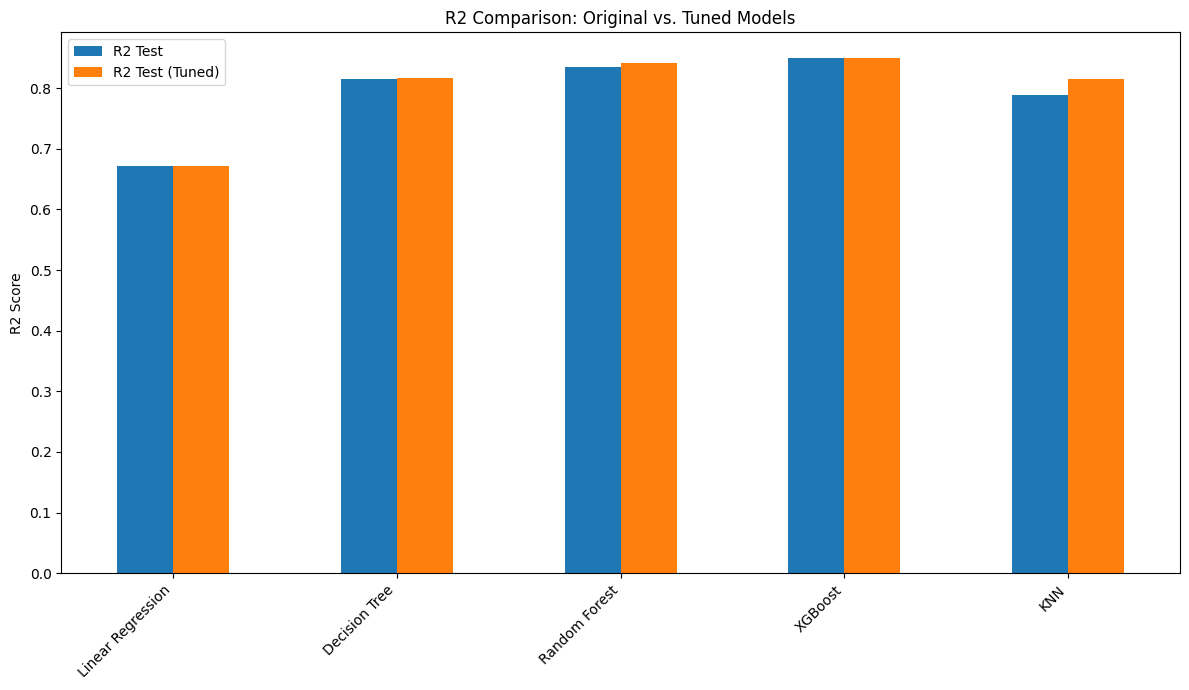

In [671]:
# Visualize the comparison of R2 scores
comparison_df[['R2 Test', 'R2 Test (Tuned)']].plot(kind='bar', figsize=(12, 7))
plt.title('R2 Comparison: Original vs. Tuned Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

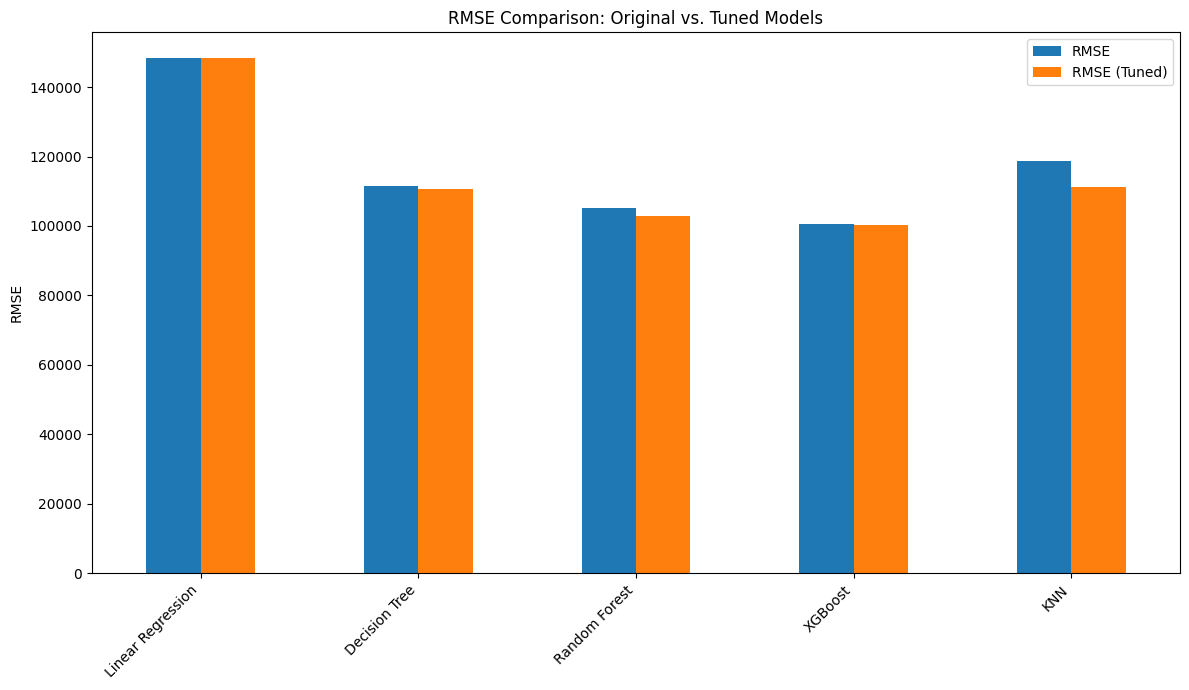

In [672]:
# Visualize the comparison of RMSE scores
comparison_df[['RMSE', 'RMSE (Tuned)']].plot(kind='bar', figsize=(12, 7))
plt.title('RMSE Comparison: Original vs. Tuned Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


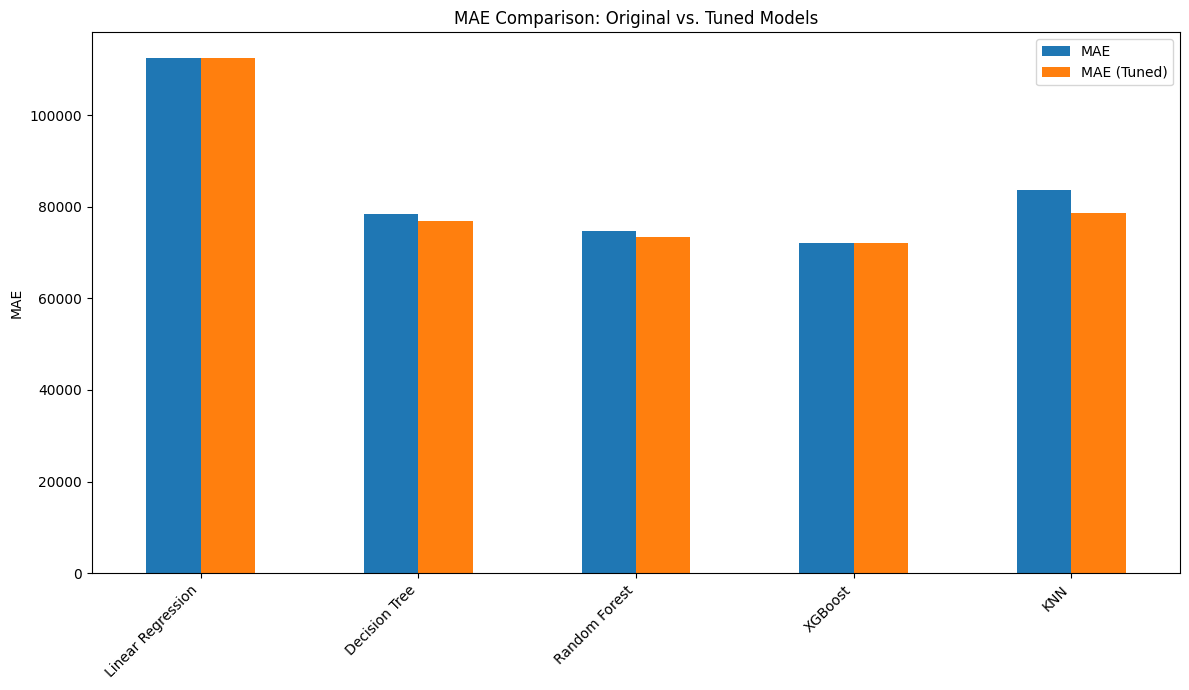

In [673]:
# Visualize the comparison of MAE scores
comparison_df[['MAE', 'MAE (Tuned)']].plot(kind='bar', figsize=(12, 7))
plt.title('MAE Comparison: Original vs. Tuned Models')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [674]:
# Identify the best performing model based on the tuned results (highest R2)
best_tuned_model_name = tuned_results_df["R2 Test (Tuned)"].idxmax()
best_tuned_model = tuned_models[best_tuned_model_name]
best_tuned_pred = best_tuned_model.predict(X_test)


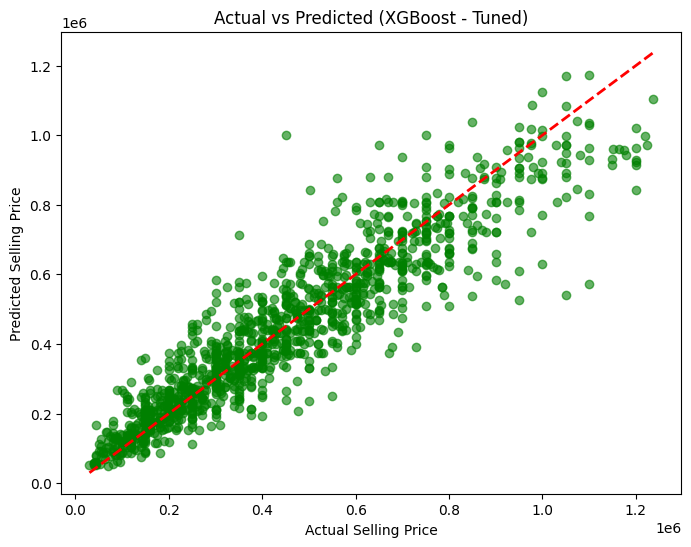


✅ Best Performing Tuned Model: XGBoost
This model achieved the highest R² and lowest error after hyperparameter tuning.


In [677]:
# Plot Actual vs Predicted for the best tuned model
plt.figure(figsize=(8,6))
plt.scatter(y_test, best_tuned_pred, alpha=0.6, color="green")

# Add the ideal prediction line (actual = predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title(f"Actual vs Predicted ({best_tuned_model_name} - Tuned)")
plt.show()

print(f"\n✅ Best Performing Tuned Model: {best_tuned_model_name}")
print("This model achieved the highest R² and lowest error after hyperparameter tuning.")